# Ceneo Analyzer

## Biblioteki

In [ ]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

## Lista kodów produktów, o których mamy pobranie opinie

In [ ]:
print(*[filename.split(".")[0] for filename in os.listdir("opinions")], sep="\n")

# 114700014, 50727511

## Kod produktu, którego opinie mają zostać przeanalizowane

In [ ]:
product_id = input("Proszę podać kod produktu: ")

## Wczytanie do obiektu

In [ ]:
opinions = pd.read_json(f"opinions/{product_id}.json")

opinions.rating = opinions.rating.apply(lambda r: r.split("/")[0].replace(",", "."), ).astype(float)
opinions.recommendation = opinions.recommendation.apply(lambda r: "Brak" if r is None else r)

## Podstawowe statystyki

In [ ]:
opinions_count  = opinions.shape[0]
pros_count      = opinions.pros.apply(lambda p: 1 if p else 0).sum()
#pros_count     = opinions.pros.apply(lambda p: None if not p else p).count()
cons_count      = opinions.cons.apply(lambda c: 1 if c else 0).sum()
avg_rating      = opinions.rating.mean()

# Histogram

In [ ]:
rating_distribution = opinions.rating.value_counts().reindex(np.arange(0, 5.5, 0.5), fill_value=0)

fig, ax = plt.subplots()
rating_distribution.plot.bar(color="#ddbea9")

plt.xticks(rotation=0)
plt.title("Histogram częstości gwiazdek")
plt.xlabel("Liczba gwiazdek")
plt.ylabel("Liczba opinii")
plt.bar_label(ax.containers[0], label_type='edge')

## Udział rekomendacji w opiniach o produkcie

In [67]:
recommendation_distrb = opinions.recommendation.value_counts().reindex(["Polecam", "Nie polecam", "Brak"])
recommendation_distrb

recommendation
Polecam        176
Nie polecam      3
Brak             3
Name: count, dtype: int64

Text(0.5, 1.0, 'Udział rekomendacji w opiniach')

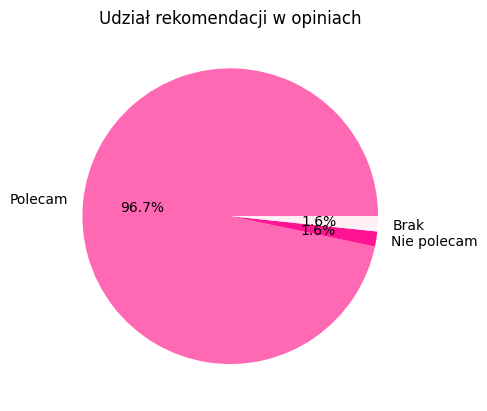

In [76]:
recommendation_distrb.plot.pie(
    colors = ["hotpink", "deeppink", "lavenderblush"],
    autopct = "%1.1f%%",
    label = ""
)
plt.title("Udział rekomendacji w opiniach")